In [36]:
import numpy as np
import matplotlib.pyplot as plt


In [37]:
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :-1]
Y = data[:, -1]

def mean_normalize(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones(N), X]
    return X_b,  maxi, mini, avg

X_b, maxi, mini, avg = mean_normalize(X)


In [79]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    N = len(y)
    thetas = np .array([[1.16270837] , [ -0.81960489] , [1.39501033] , [0.29763545]])
    thetas_path = [thetas]
    losses = []
    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            # Compute output
            y_pred = xi.dot(thetas)

            # Compute loss
            loss = ((y_pred - yi) ** 2)/2
            losses.append(float(loss))

            # Compute gradient for loss
            gradient = xi.T.dot(xi.dot(thetas) - yi)

            # Update thetas
            thetas = thetas - learning_rate * gradient

            #log thetas
            thetas_path.append(thetas)
    return thetas_path, losses

C:\Users\DELL\AppData\Local\Temp\ipykernel_17552\2568839267.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(float(loss))


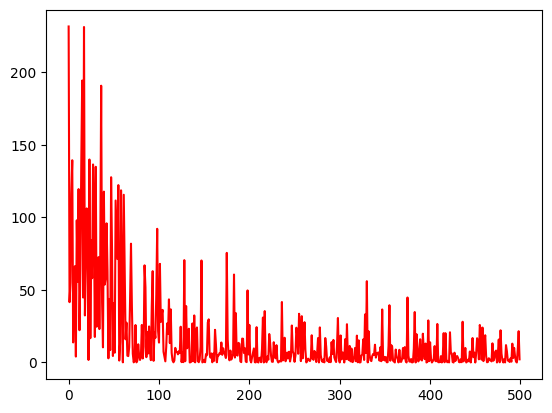

In [80]:
sgd_theta, sgd_losses = stochastic_gradient_descent(X_b, Y, n_epochs=50, learning_rate=0.01)

X_axis = list(range(500))
plt.plot(X_axis, sgd_losses[:500], color="r")
plt.show()


In [95]:
def minibatch_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001, minibatch_size=10):
    N = len(y)
    thetas = np.array([[1.16270837] , [ -0.81960489] , [1.39501033] , [0.29763545]])
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # shuffled_indices = np . random . permutation ( N ) # uncomment this code for real application
        shuffled_indices = np.asarray([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
        132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
        185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
        165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
        169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
        77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
        195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
        92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
        174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
        129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
        168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
        133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
        154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # Compute output
            y_pred = xi.dot(thetas)

            # Compute loss
            loss = ((y_pred - yi)**2)/2


            # Compute gradient
            gradient = xi.T.dot((xi.dot(thetas) - yi)/minibatch_size)

            # Update thetas
            thetas = thetas - learning_rate * gradient

            # Log thetas
            losses.append(np.sum(loss)/minibatch_size)
            thetas_path.append(thetas)
    return thetas_path, losses


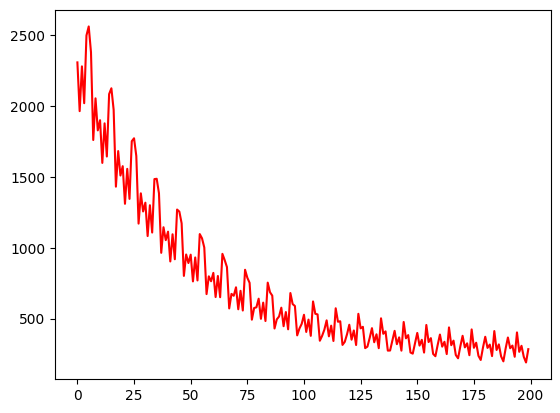

In [96]:
mbgd_theta, mbgd_losses = minibatch_gradient_descent(X_b, Y, n_epochs=50, learning_rate=0.01, minibatch_size=20)

X_axis = list(range(200))
plt.plot(X_axis, mbgd_losses[:200], color="r")
plt.show()



In [97]:
def batch_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    N = len(y)
    thetas = np.array([[1.16270837] , [ -0.81960489] , [1.39501033] , [0.29763545]])
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):

        # Compute output
        y_pred = X_b.dot(thetas)

        # Compute loss
        loss = ((y_pred - y)**2)/N

        # Compute gradient
        gradient = X_b.T.dot((y_pred - y)/N)

        # Update thetas
        thetas = thetas - learning_rate * gradient

        # Log thetas and losses
        thetas_path.append(thetas)
        losses.append(float(np.sum(loss)/N))
    return thetas_path, losses



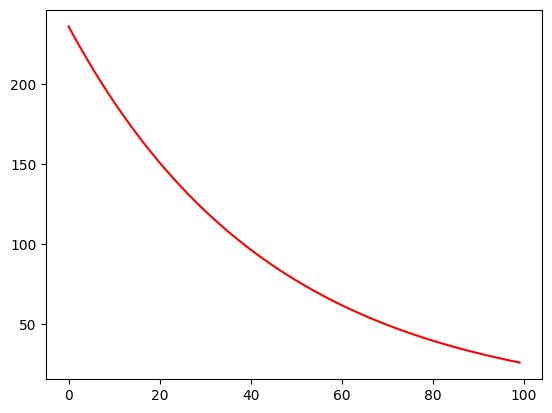

In [98]:
bgd_theta, bgd_losses = batch_gradient_descent(X_b, Y, n_epochs=100, learning_rate=0.01)

X_axis = list(range(100))
plt.plot(X_axis, bgd_losses[:100], color="r")
plt.show()


In [99]:
#Question 1
sgd_theta, losses = stochastic_gradient_descent ( X_b , Y , n_epochs =1 , learning_rate=0.01 )
print(np.sum(losses))

6754.643359356192


C:\Users\DELL\AppData\Local\Temp\ipykernel_17552\2568839267.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(float(loss))


In [100]:
#Question 2
mbgd_thetas, losses = minibatch_gradient_descent(X_b, Y, n_epochs=50, minibatch_size = 20, learning_rate=0.01)
print(round(sum(losses),2))


224856.46


In [101]:
#Question 3
bgd_thetas, losses = batch_gradient_descent(X_b, Y, n_epochs=100, learning_rate=0.01)
print(round(sum(losses),2))

9558.21
